<a href="https://colab.research.google.com/github/RM-RAMASAMY/CMPE-255/blob/main/Assignment_3_Pycaret/Clustering_With_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets &>/dev/null
!pip install pycaret[full] &>/dev/null

import opendatasets as od
import pandas

In [19]:
od.download("https://www.kaggle.com/datasets/tarekmuhammed/university-students-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rmramasamy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tarekmuhammed/university-students-data



100%|██████████| 31.6k/31.6k [00:00<00:00, 27.9MB/s]

In [20]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [21]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pandas.read_csv('/content/university-students-data/Kmeans_assignment_data.csv')

In [22]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(777, 19)"
2,Transformed data shape,"(777, 795)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [24]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [25]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [26]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(777, 19)"
2,Transformed data shape,"(777, 795)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [27]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3805,469.6668,0.8433,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [30]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4183,118.0105,0.9397,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [31]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Cluster 0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Cluster 2
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Cluster 0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Cluster 2
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,Cluster 0
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,Cluster 0
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,Cluster 0
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Cluster 3


In [32]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

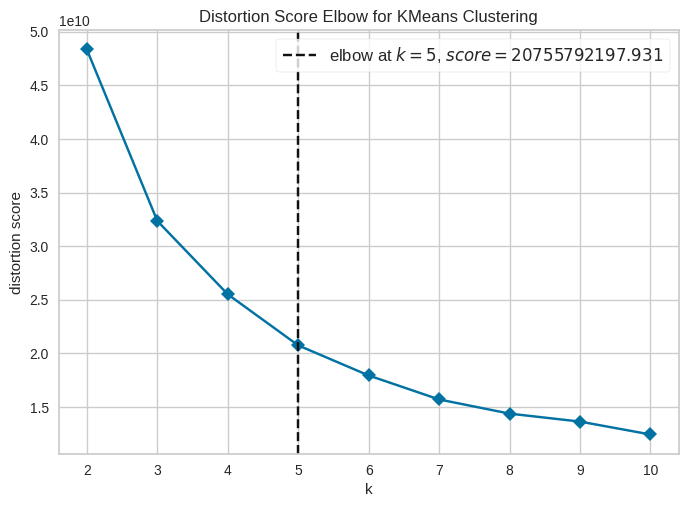

In [33]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

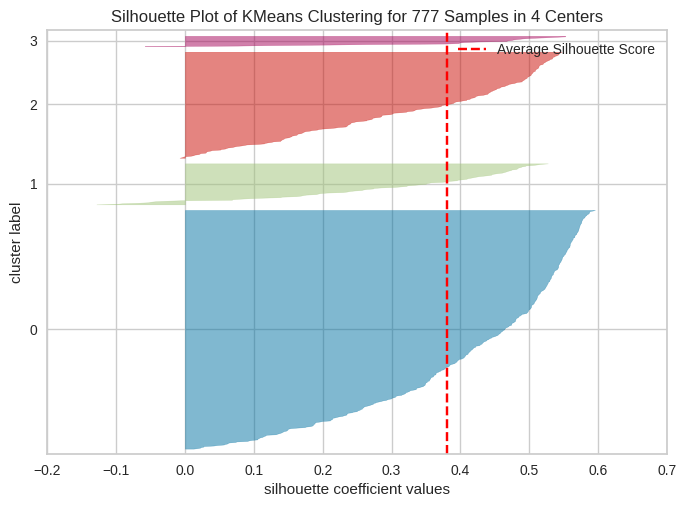

In [34]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [35]:
# check docstring to see available plots
# help(plot_model)

In [36]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Unnamed: 0_Abilene Christian University,Unnamed: 0_Adelphi University,Unnamed: 0_Adrian College,Unnamed: 0_Agnes Scott College,Unnamed: 0_Alaska Pacific University,Unnamed: 0_Albertson College,Unnamed: 0_Albertus Magnus College,Unnamed: 0_Albion College,Unnamed: 0_Albright College,Unnamed: 0_Alderson-Broaddus College,...,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0,Cluster 0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0,Cluster 2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0,Cluster 0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0,Cluster 2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0,Cluster 0
773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0,Cluster 0
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0,Cluster 0
775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0,Cluster 3


In [38]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Apps', 'Accept', 'Enroll',
                                              'Top10perc', 'Top25perc',
                                              'F.Undergrad', 'P.Undergrad',
                                              'Outstate', 'Room.Board', 'Books',
                                              'Personal', 'PhD', 'Terminal',
                                              'S.F.Ratio', 'perc.alumni',
                                              'Expend', 'Grad.Rate'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper...
                                     transformer=OrdinalEncoder(cols=['Private'],
                                                                handle_missing='return_nan',
                                                                mapping=[

In [39]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Apps', 'Accept', 'Enroll',
                                             'Top10perc', 'Top25perc',
                                             'F.Undergrad', 'P.Undergrad',
                                             'Outstate', 'Room.Board', 'Books',
                                             'Personal', 'PhD', 'Terminal',
                                             'S.F.Ratio', 'perc.alumni',
                                             'Expend', 'Grad.Rate'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 Transfo...
                                    transformer=OrdinalEncoder(cols=['Private'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Private',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': No     0
Yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Unnamed: 0'],
                                    transformer=OneHotEncoder(cols=['Unnamed: '
                                                                    '0'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [40]:
# init setup
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(777, 19)"
2,Transformed data shape,"(777, 795)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [41]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [42]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Unnamed: 0_Abilene Christian University,Unnamed: 0_Adelphi University,Unnamed: 0_Adrian College,Unnamed: 0_Agnes Scott College,Unnamed: 0_Alaska Pacific University,Unnamed: 0_Albertson College,Unnamed: 0_Albertus Magnus College,Unnamed: 0_Albion College,Unnamed: 0_Albright College,Unnamed: 0_Alderson-Broaddus College,...,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6797.0,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0
773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11520.0,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6900.0,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0
775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19840.0,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0


In [43]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [44]:
# help(setup)

In [45]:
# init setup with normalize = True

s = setup(data, session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Original data shape,"(777, 19)"
2,Transformed data shape,"(777, 795)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


<Axes: >

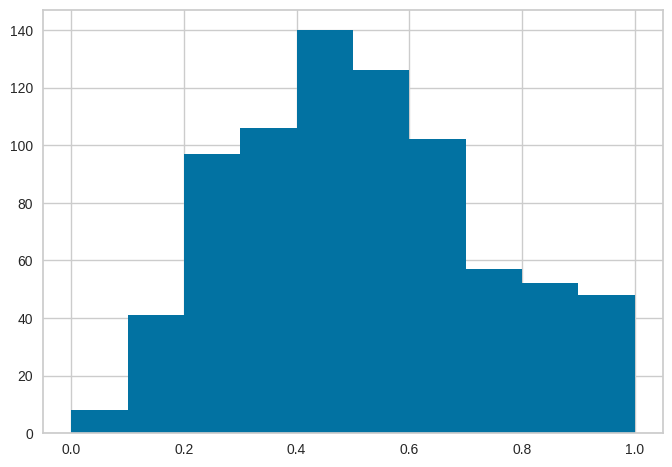

In [46]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Top25perc'].hist()

<Axes: >

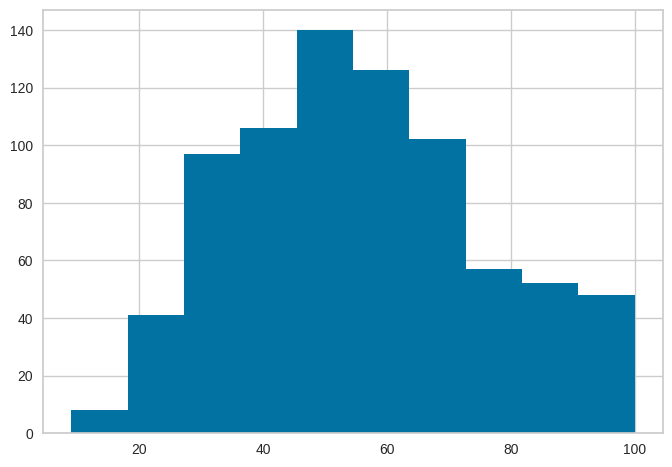

In [47]:
get_config('X_train')['Top25perc'].hist()

In [48]:
# from pycaret.clustering import *
# s = setup(data, log_experiment='mlflow', experiment_name='jewellery_project')

In [49]:
# train kmeans
# kmeans = create_model('kmeans')

In [50]:
# start mlflow server on localhost:5000
# !mlflow ui

In [51]:
# help(setup)

In [52]:
# check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [53]:
# train kmeans
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0833,78.4472,3.0915,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [54]:
kmeans_results = pull()
print(type(kmeans_results))
kmeans_results

<class 'pandas.core.frame.DataFrame'>


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0833,78.4472,3.0915,0,0,0


In [55]:
# train kmeans with 10 clusters
create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0212,32.5188,4.9084,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=10, random_state=123)

In [56]:
# help(create_model)

In [57]:
assign_model(kmeans)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Cluster 0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Cluster 0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Cluster 0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Cluster 1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,Cluster 3
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,Cluster 0
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,Cluster 0
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Cluster 1


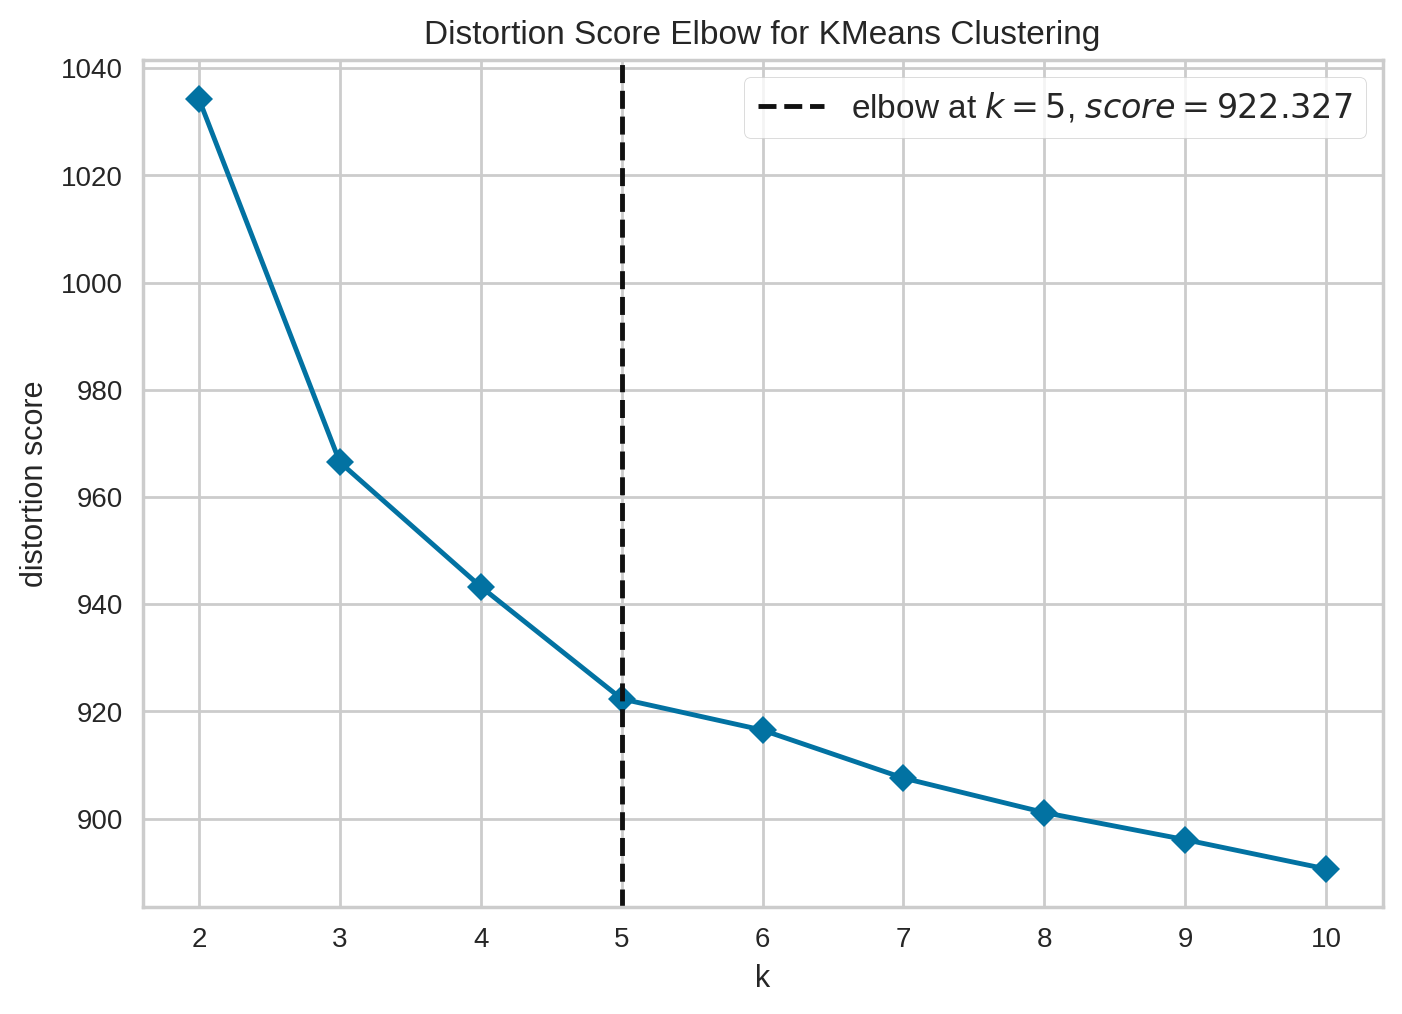

In [58]:
# to control the scale of plot
plot_model(kmeans, plot = 'elbow', scale = 2)

In [59]:
# to save the plot
plot_model(kmeans, plot = 'elbow', save=True)

'Elbow Plot.png'

In [60]:
# help(plot_model)

In [61]:
# deploy model on aws s3
# deploy_model(kmeans, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [62]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [63]:
# save model
save_model(kmeans, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Apps', 'Accept', 'Enroll',
                                              'Top10perc', 'Top25perc',
                                              'F.Undergrad', 'P.Undergrad',
                                              'Outstate', 'Room.Board', 'Books',
                                              'Personal', 'PhD', 'Terminal',
                                              'S.F.Ratio', 'perc.alumni',
                                              'Expend', 'Grad.Rate'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper...
                                                                mapping=[{'col': 'Private',
                                                                          'data_type': dtype('O'),
                                                         

In [64]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Apps', 'Accept', 'Enroll',
                                             'Top10perc', 'Top25perc',
                                             'F.Undergrad', 'P.Undergrad',
                                             'Outstate', 'Room.Board', 'Books',
                                             'Personal', 'PhD', 'Terminal',
                                             'S.F.Ratio', 'perc.alumni',
                                             'Expend', 'Grad.Rate'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 Transfo...
                                                               mapping=[{'col': 'Private',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': No     0
Yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Unnamed: 0'],
                                    transformer=OneHotEncoder(cols=['Unnamed: '
                                                                    '0'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [65]:
# save experiment
save_experiment('my_experiment')

In [66]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(777, 19)"
2,Transformed data shape,"(777, 795)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1
